# Add Renewable Generators

This demo shows how to add renewable generators without removing the existing synchronous generators.

In [1]:
import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=20)

In [4]:
ss = andes.load(andes.get_case('ieee14/ieee14_linetrip.xlsx'),
                setup=False, no_output=True, default_config=False)

Working directory: "/Users/jinningwang/work/andes/examples/demonstration"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/work/andes/andes/cases/ieee14/ieee14_linetrip.xlsx"...
Input file parsed in 0.1935 seconds.


In [5]:
ss.Bus.as_df()

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1,BUS1,69,1.1,0.9,1.03000,0.000000,0,0,1,1,1
1,2,1,BUS2,69,1.1,0.9,1.01970,-0.027981,0,0,1,1,1
2,3,1,BUS3,69,1.1,0.9,1.00042,-0.060097,0,0,1,1,1
3,4,1,BUS4,69,1.1,0.9,0.99858,-0.074721,0,0,1,1,1
4,5,1,BUS5,69,1.1,0.9,1.00443,-0.064315,0,0,1,1,1
5,6,1,BUS6,138,1.1,0.9,0.99871,-0.109998,0,0,2,2,2
6,7,1,BUS7,138,1.1,0.9,1.00682,-0.084285,0,0,2,2,2
7,8,1,BUS8,69,1.1,0.9,1.01895,-0.024339,0,0,2,2,2
8,9,1,BUS9,138,1.1,0.9,1.00193,-0.127502,0,0,2,2,2


> **Note**: The method used below, `GroupBase.as_df()`, is newly added in version 1.9.3.

In [6]:
ss.StaticGen.as_df()

,u,name,idx,bus,Sn,Vn,p0,q0,ra,xs
0,1,2,2,2,100,69,0.40000,0.15000,0,0.13
1,1,3,3,3,100,69,0.40000,0.15000,0,0.13
2,1,4,4,6,100,138,0.30000,0.10000,0,0.12
3,1,5,5,8,100,69,0.35000,0.10000,0,0.12
4,1,1,1,1,100,69,0.81442,0.01962,0,0.23


In [7]:
ss.SynGen.as_df()

,u,name,idx,bus,gen,Sn,Vn,fn,M,D
0,1,GENROU_1,GENROU_1,1,1,100,69,60,8,0
1,1,GENROU_2,GENROU_2,2,2,100,69,60,13,0
2,1,GENROU_3,GENROU_3,3,3,100,69,60,10,0
3,1,GENROU_4,GENROU_4,6,4,100,138,60,10,0
4,1,GENROU_5,GENROU_5,8,5,100,69,60,10,0


After inspecting the case, we find that there are 5 existing synchronous generators connected to 5 different buses.
To add renewable generators, we need 1) add new static generators, and 2) add new corresponding renweable generators.

In [8]:
ss.add(model='PV', param_dict=dict(idx='PV4', bus=4, p0=0.1, q0=0.1))
ss.add(model='PV', param_dict=dict(idx='PV7', bus=7, p0=0.1, q0=0.1))

'PV7'

In [9]:
Kp, Ki = 0.001, 0.01
ss.add(model='REGCV2', param_dict=dict(bus=4, gen='PV4', Sn=100, Kpvd=Kp, Kivd=Ki, Kpvq=Kp, Kivq=Ki))
ss.add(model='REGCV2', param_dict=dict(bus=7, gen='PV7', Sn=100, Kpvd=Kp, Kivd=Ki, Kpvq=Kp, Kivq=Ki))

'REGCV2_2'

Now we successfully add additional renewable generators to the system.

In [10]:
ss.REGCV2.as_df()

,idx,u,name,bus,gen,coi2,Sn,fn,Tc,kw,...,ra,xs,gammap,gammaq,Kpvd,Kivd,Kpvq,Kivq,Tiq,Tid
uid,,,,,,,,,,,,,,,,,,,,,
0,REGCV2_1,1,REGCV2_1,4,PV4,None,100,60.0,0.01,0.0,...,0.0,0.2,1.0,1.0,0.001,0.01,0.001,0.01,0.01,0.01
1,REGCV2_2,1,REGCV2_2,7,PV7,None,100,60.0,0.01,0.0,...,0.0,0.2,1.0,1.0,0.001,0.01,0.001,0.01,0.01,0.01


In [11]:
ss.setup()

System internal structure set up in 0.0198 seconds.


True

> **Note**: Please note that adding new static generators will alter the system’s power flow solution. Make sure that the power flow remains solvable and reasonable.

In [12]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0039 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.00578100059
2: |F(x)| = 4.88447848e-06
3: |F(x)| = 3.587970199e-12
Converged in 4 iterations in 0.0030 seconds.


True

In [13]:
_ = ss.TDS.init()

Initialization for dynamics completed in 0.0368 seconds.
Initialization was successful.


In [14]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggler_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggler_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


Simulation to t=20.00 sec completed in 1.0539 seconds.


True

Then we can see that now the replaced synchronous generator `GENROU_5` is replaced by a renewable generator `REGCV2_1`.

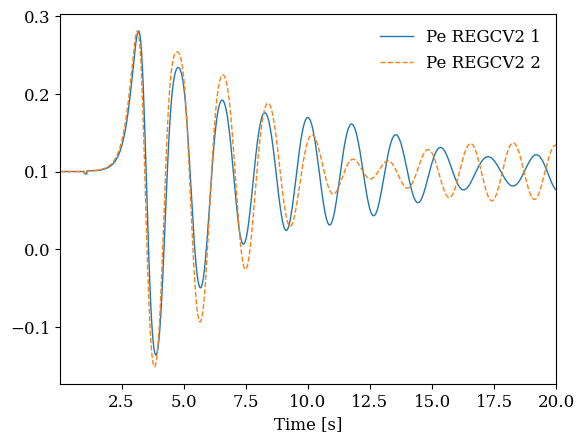

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [15]:
ss.TDS.plt.plot(ss.REGCV2.Pe, latex=False)

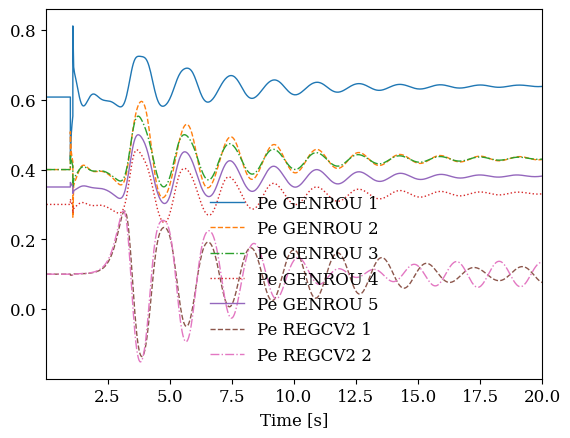

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [16]:
ss.TDS.plt.plot([ss.GENROU.Pe, ss.REGCV2.Pe], latex=False)